<a href="https://colab.research.google.com/github/yurifillippo/datascience/blob/master/Analisando_a_Viol%C3%AAncia_no_Rio_de_Janeirob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="http://sigmoidal.ai/wp-content/uploads/2019/08/logo_color.png" height="40px"></center>

# Analisando a Violência no Rio de Janeiro

O Rio de Janeiro infelizmente é uma "referência" quando o assunto é violência no Brasil, todos os meses há centenas de crimes, e constantemente o Estado está em GUERRA.
Vamos analisar alguns dados sobre a violência na cidade maravilhosa, e tentar identificar quais crimes mais ocorrem e se ao passar dos anos a violência vem aumentando ou diminuindo.

## Obtenção dos Dados

Os dados foram pré-processados por Carlos Melo, instrutor de Data Science do Sigmoidal

A fonte dos dados foi o site oficial do Governo do Estado do Rio de Janeiro:

http://www.ispdados.rj.gov.br/estatistica.html





### Importando os dados

In [0]:
#Importando pandas
import pandas as pd
#Importando dados
df = pd.read_csv('https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_02/violencia_rio.csv') 

## Análise Inicial dos Dados
* Qual o tamanho do DataFrame
* Verificar nomes das colunas (variáveis)
* Quais os tipos das variáveis
* Visualizar as primeiras entradas
* Identificar a porcentagem de valores ausentes das colunas


In [0]:
#Tamanho do seu DataFrame
print('Quantidade de entradas: {}'.format(df.shape[0]))
print('Quantidade de variáveis: {}'.format(df.shape[1]))

Quantidade de entradas: 344
Quantidade de variáveis: 56


In [0]:
#Verificando as variáveis que temos no dataset
df.columns

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

In [0]:
#Tipos de variáveis
df.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

In [0]:
#Ver primeiras entradas
df.head(3)

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3


In [0]:
#Verificando valores ausentes
df.isnull().sum() / df.shape[0]

vano                          0.000000
mes                           0.000000
hom_doloso                    0.000000
lesao_corp_morte              0.279070
latrocinio                    0.000000
hom_por_interv_policial       0.244186
tentat_hom                    0.000000
lesao_corp_dolosa             0.000000
estupro                       0.418605
hom_culposo                   0.244186
lesao_corp_culposa            0.279070
roubo_comercio                0.000000
roubo_residencia              0.000000
roubo_veiculo                 0.000000
roubo_carga                   0.000000
roubo_transeunte              0.000000
roubo_em_coletivo             0.000000
roubo_banco                   0.000000
roubo_cx_eletronico           0.418605
roubo_celular                 0.313953
roubo_conducao_saque          0.418605
roubo_apos_saque              0.418605
roubo_bicicleta               0.802326
outros_roubos                 0.000000
total_roubos                  0.000000
furto_veiculos           

## Informações Estatísticas da Violência no Rio de Janeiro

* Resumo estatístico do DataFrame
* Médias das seguintes variáveis (colunas):
  * `roubo_veiculo`
  * `furto_veiculos`
  * `recuperacao_veiculos`
* Porcentagem de carros recuperados em relação aos carros roubados + carros furtados:
  * $\frac{\text{recuperacao_veiculos}}{\text{roubo_veiculo} + \text{furto_veiculos}}$
* Valores máximos (`max`) e mínimos (`min`) da coluna `hom_doloso`


In [0]:
#Resumo estatístico do DataFrame
df.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000

In [0]:
#Média de roubo de veículos
print("A média dos roubos de veículo é: {:.2f}".format(df.roubo_veiculo.mean()))
print("A média dos furtos de veículos é: {:.2f}".format(df.furto_veiculos.mean()))
print("A média de recuperação dos veículos é: {:.2f}".format(df.recuperacao_veiculos.mean()))

A média dos roubos de veículo é: 2448.70
A média dos furtos de veículos é: 1674.67
A média de recuperação dos veículos é: 1772.24


In [0]:
#Porcentagem de carros recuperados em relação aos carros roubados + carros furtados

#Soma de furtos e roubos envolvendo veículos
veiculos_com_ocorrencia = df.roubo_veiculo.sum() + df.furto_veiculos.sum()

#Soma de carros recuperados
carros_recuperados = df.recuperacao_veiculos.sum()

#Porcentagem de veículos recuperados
resultado_veiculos_recuperados = carros_recuperados / veiculos_com_ocorrencia

print("Foram recuperados {:.2%} dos veículos envolvidos em roubos e furtos".format(resultado_veiculos_recuperados))

Foram recuperados 42.98% dos veículos envolvidos em roubos e furtos


In [0]:
#Menor valor registrado de homicídios dolosos
print("A menor quantidade registrada de homicídeos dolosos são de {} crimes".format(df.hom_doloso.min()))
#Maior valor reugistrado de homicídios dolosos
print("A maior quantidade registrada de homicídeos dolosos são de {} crimes".format(df.hom_doloso.max()))

A menor quantidade registrada de homicídeos dolosos são de 272 crimes
A maior quantidade registrada de homicídeos dolosos são de 831 crimes


## Visualização de Dados

Iremos visualizar em alguns gráficos os crimes citados abaixo, com suas devidas observações na conclusão final na análise.

* Histograma de `hom_doloso`
* Gráfico de linhas para a variável `roubo_em_coletivo`
* Gráfico de `total_roubos`
* Gráfico de `total_furtos`


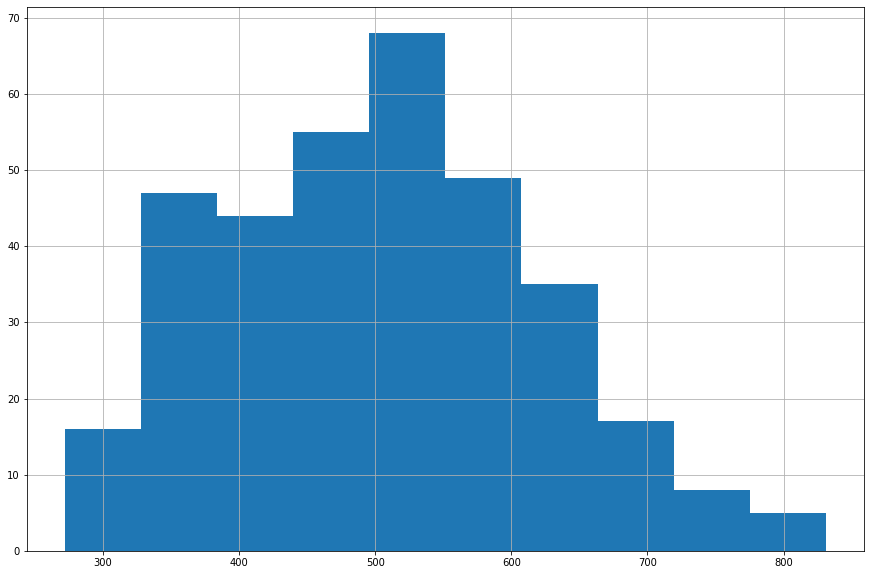

In [0]:
#Histograma de homicídeos dolosos
df.hom_doloso.hist(figsize=(15,10));

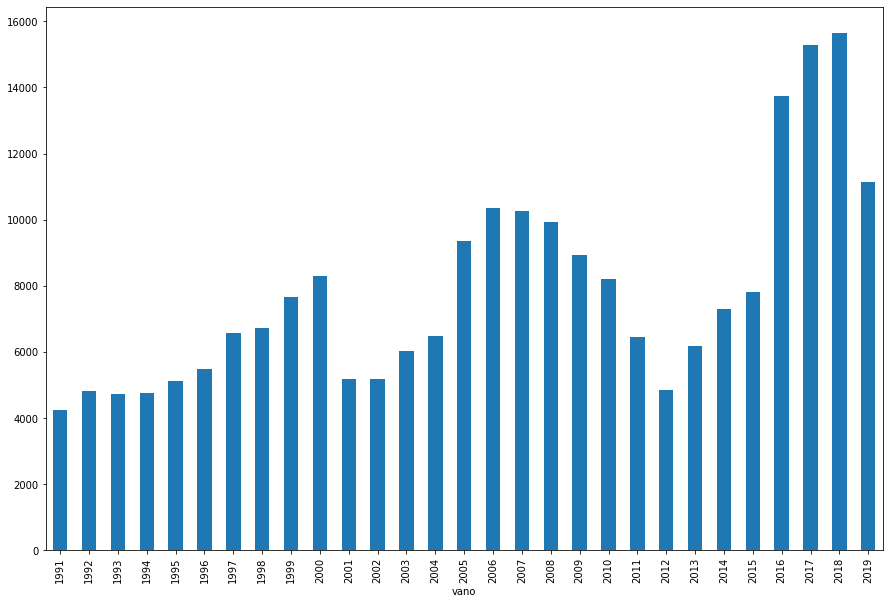

In [0]:
#Gráficos de roubos em coletivos
df.groupby(["vano"]).roubo_em_coletivo.sum().plot.bar(figsize=(15,10));

In [0]:
#Total de roubos por ano
df.groupby(['vano']).total_roubos.sum()

vano
1991     42784
1992     52172
1993     48949
1994     53958
1995     49271
1996     46507
1997     55491
1998     62368
1999     76523
2000     83242
2001     97973
2002    114720
2003    118834
2004    110903
2005    113437
2006    124087
2007    137422
2008    141175
2009    138280
2010    120300
2011    106688
2012    103775
2013    126190
2014    157995
2015    147933
2016    208781
2017    230437
2018    231606
2019    141472
Name: total_roubos, dtype: int64

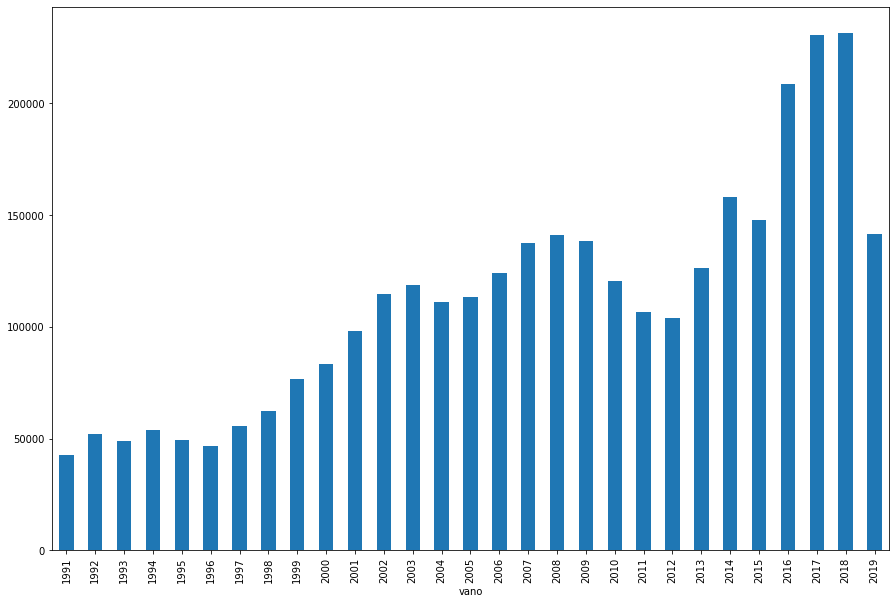

In [0]:
#Gráfico de roubos por ano
df.groupby(['vano']).total_roubos.sum().plot.bar(figsize=(15,10));

In [0]:
#Total de furtos por ano
df.groupby(['vano']).total_furtos.sum()

vano
1991     77211
1992     82646
1993     76668
1994     69491
1995     59986
1996     61078
1997     71797
1998     76387
1999     80007
2000     88358
2001     97868
2002    107258
2003    119533
2004    118770
2005    126333
2006    140874
2007    157150
2008    168945
2009    170245
2010    174776
2011    176000
2012    178739
2013    182815
2014    182340
2015    179845
2016    169238
2017    145290
2018    143870
2019    105495
Name: total_furtos, dtype: int64

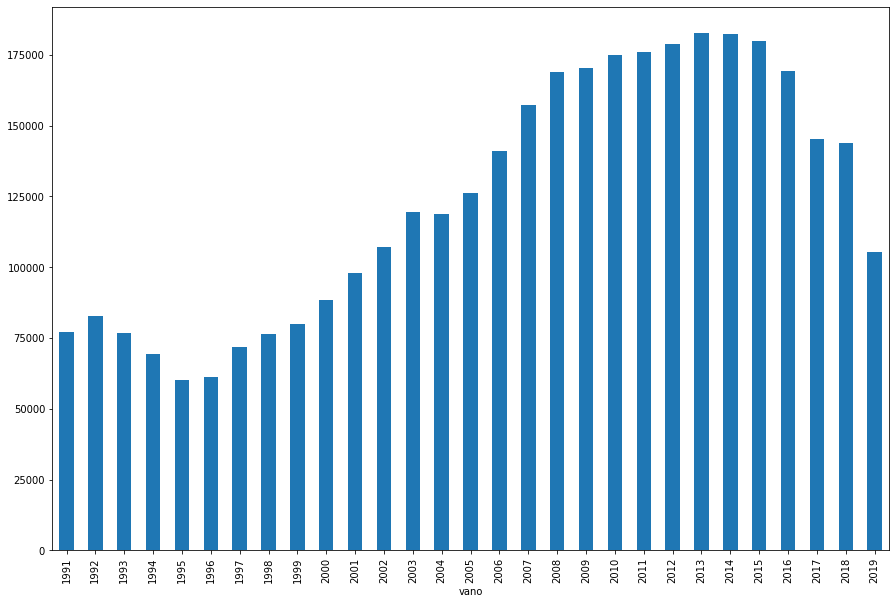

In [0]:
#Gráfico de furtos por ano
df.groupby(['vano']).total_furtos.sum().plot.bar(figsize=(15,10));

## Conclusão

Como temos em nosso dataset 38 tipos de crimes diferentes, analisamos alguns deles:

**Roubos e Furtos de Veículos:**

Temos uma média de 2448,7 de roubos de veículos ao ano e 1674,67 de furtos de veículos ao ano, onde do total de 4.123,37‬ temos uma média de recuperação de 1772,24  veículos, o que representa 42,98 %


**Homicídios dolosos:**

Dentre os anos de 1991 até 2019 tivemos o mínimo de 272 e o máximo de 831 homicídios.

Analisando um histográma conseguimos verificar que o número de homicídios durante os anos citados tem uma concentração maior em 550 casos.

**Roubos em coletivos:**

Aumento expressivo a partir de 2016

**Total de Roubos por ano:**

Uma média de 9428 casos por ano, com um aumento mais expressivo a partir de 2016


**Total de Furtos por ano:**

Uma média de 10433 casos por ano, com um aumento a partir de 2006 e uma diminuição em 2019



